In [1]:
# Importing The Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

url = 'https://github.com/amitaslanov/Final-Project-Data-Mining-2024/raw/main/LoanData.csv'

data = pd.read_csv(url)

data.head()

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status,has_second_income,total_income
0,NJ,3.0,60,rent,59000,Not Verified,0.557525,95131,32894,8,debt_consolidation,22000,B,10.90,0,Current,False,59000
1,CA,10.0,36,rent,60000,Not Verified,1.305683,51929,78341,2,credit_card,6000,B,9.92,1,Current,False,60000
2,SC,NaN,36,mortgage,75000,Verified,1.056280,301373,79221,14,debt_consolidation,25000,E,26.30,0,Current,False,75000
3,CA,0.0,36,rent,75000,Not Verified,0.574347,59890,43076,10,credit_card,6000,B,9.92,0,Current,False,75000
4,OH,4.0,60,mortgage,254000,Not Verified,0.238150,422619,60490,2,home_improvement,25000,B,9.43,0,Current,False,254000


In [2]:
# Handle missing values
data = data.dropna()  

In [3]:
# Convert categorical variables to numeric

le = LabelEncoder()
data['state'] = le.fit_transform(data['state'])
data['emp_length'] = le.fit_transform(data['emp_length'])
data['homeownership'] = le.fit_transform(data['homeownership'])
data['verified_income'] = le.fit_transform(data['verified_income'])
data['loan_purpose'] = le.fit_transform(data['loan_purpose'])
data['loan_status'] = le.fit_transform(data['loan_status'])
data['has_second_income'] = le.fit_transform(data['has_second_income'])

In [4]:
# Encoding the 'grade' column which is our target
data['grade'] = le.fit_transform(data['grade'])

# Split the dataset into features and target variable
X = data.drop('grade', axis=1)
y = data['grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

state                      0.152714
emp_length                -0.069647
term                       0.282028
homeownership             -0.103776
annual_income             -0.196945
verified_income            0.333457
debt_to_income             0.095841
total_credit_limit        -0.101229
total_credit_utilized      0.089326
num_cc_carrying_balance    0.125327
loan_purpose              -0.357556
loan_amount                0.169523
grade                      1.000000
interest_rate              0.969820
public_record_bankrupt     0.005691
loan_status                0.092741
has_second_income          0.109733
total_income              -0.114310
Name: grade, dtype: float64


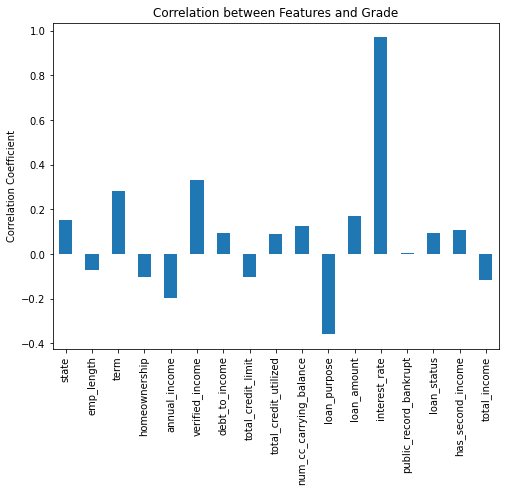

In [5]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlations with the 'grade' column
target_correlation = correlation_matrix['grade']

# Display the correlation values between features and 'grade'
print(target_correlation)

# plot the correlations for better visualization
plt.figure(figsize=(8, 6))
target_correlation.drop('grade').plot(kind='bar')
plt.title('Correlation between Features and Grade')
plt.ylabel('Correlation Coefficient')
plt.show()

In [6]:
# Get the top 5 features with the highest absolute correlation values
top_5_correlated_features = target_correlation.drop('grade').abs().sort_values(ascending=False).head(5)

# Display the top 5 features and their correlation values
print(top_5_correlated_features)

interest_rate      0.969820
loan_purpose       0.357556
verified_income    0.333457
term               0.282028
annual_income      0.196945
Name: grade, dtype: float64


In [7]:
# Train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions with the Random Forest model
rf_predictions = random_forest.predict(X_test)

# Evaluate the Random Forest model's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_precision = precision_score(y_test, rf_predictions, average='weighted')

# Print the AdaBoost model's performance metrics
print(f"Random Forest: Accuracy = {rf_accuracy}, F1 Score = {rf_f1}, Recall = {rf_recall}, precision = {rf_precision}")

Random Forest: Accuracy = 0.8, F1 Score = 0.8, Recall = 0.8, precision = 0.8


In [8]:
# Train the GBM model
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Make predictions with the GBM model
gbm_predictions = gbm.predict(X_test)

# Evaluate the GBM model's performance
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
gbm_f1 = f1_score(y_test, gbm_predictions, average='weighted')
gbm_recall = recall_score(y_test, gbm_predictions, average='weighted')
gbm_precision = precision_score(y_test, gbm_predictions, average='weighted')

# Print the GBM model's performance metrics
print(f"GBM: Accuracy = {gbm_accuracy}, F1 Score = {gbm_f1}, Recall = {gbm_recall}, precision = {gbm_precision}")

GBM: Accuracy = 0.9, F1 Score = 0.9028571428571428, Recall = 0.9, precision = 0.9333333333333333


In [9]:
# Train the AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions with the AdaBoost model
adaboost_predictions = adaboost.predict(X_test)

# Evaluate the AdaBoost model's performance
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_f1 = f1_score(y_test, adaboost_predictions, average='weighted')
adaboost_recall = recall_score(y_test, adaboost_predictions, average='weighted')
adaboost_precision = precision_score(y_test, adaboost_predictions, average='weighted')

# Print the AdaBoost model's performance metrics
print(f"AdaBoost: Accuracy = {adaboost_accuracy}, F1 Score = {adaboost_f1}, Recall = {adaboost_recall}, precision = {adaboost_precision}")

AdaBoost: Accuracy = 0.8, F1 Score = 0.72, Recall = 0.8, precision = 0.6666666666666666


C:\Users\amits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Evaluate the models' performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)

rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
gbm_f1 = f1_score(y_test, gbm_predictions, average='weighted')
adaboost_f1 = f1_score(y_test, adaboost_predictions, average='weighted')

rf_recall = recall_score(y_test, rf_predictions, average='weighted')
gbm_recall = recall_score(y_test, gbm_predictions, average='weighted')
adaboost_recall = recall_score(y_test, adaboost_predictions, average='weighted')

rf_precision = precision_score(y_test, rf_predictions, average='weighted')
gbm_precision = precision_score(y_test, gbm_predictions, average='weighted')
adaboost_precision = precision_score(y_test, adaboost_predictions, average='weighted')

# Print the performance metrics for each model
print(f"Random Forest: Accuracy = {rf_accuracy}, F1 Score = {rf_f1}, Recall = {rf_recall}, precision = {rf_precision}")
print(f"GBM: Accuracy = {gbm_accuracy}, F1 Score = {gbm_f1}, Recall = {gbm_recall}, precision = {gbm_precision}")
print(f"AdaBoost: Accuracy = {adaboost_accuracy}, F1 Score = {adaboost_f1}, Recall = {adaboost_recall}, precision = {adaboost_precision}")


Random Forest: Accuracy = 0.8, F1 Score = 0.8, Recall = 0.8, precision = 0.8
GBM: Accuracy = 0.9, F1 Score = 0.9028571428571428, Recall = 0.9, precision = 0.9333333333333333
AdaBoost: Accuracy = 0.8, F1 Score = 0.72, Recall = 0.8, precision = 0.6666666666666666


C:\Users\amits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd

# Calculate metrics
metrics = {
    'Accuracy': {
        'Random Forest': accuracy_score(y_test, rf_predictions),
        'GBM': accuracy_score(y_test, gbm_predictions),
        'AdaBoost': accuracy_score(y_test, adaboost_predictions),
    },
    'F1 Score': {
        'Random Forest': f1_score(y_test, rf_predictions, average='weighted'),
        'GBM': f1_score(y_test, gbm_predictions, average='weighted'),
        'AdaBoost': f1_score(y_test, adaboost_predictions, average='weighted'),
    },
    'Recall': {
        'Random Forest': recall_score(y_test, rf_predictions, average='weighted'),
        'GBM': recall_score(y_test, gbm_predictions, average='weighted'),
        'AdaBoost': recall_score(y_test, adaboost_predictions, average='weighted'),
    },
    'Precision': {
        'Random Forest': precision_score(y_test, rf_predictions, average='weighted'),
        'GBM': precision_score(y_test, gbm_predictions, average='weighted'),
        'AdaBoost': precision_score(y_test, adaboost_predictions, average='weighted'),
    }
}

# Create a DataFrame from the metrics
df_metrics = pd.DataFrame(metrics)

C:\Users\amits\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


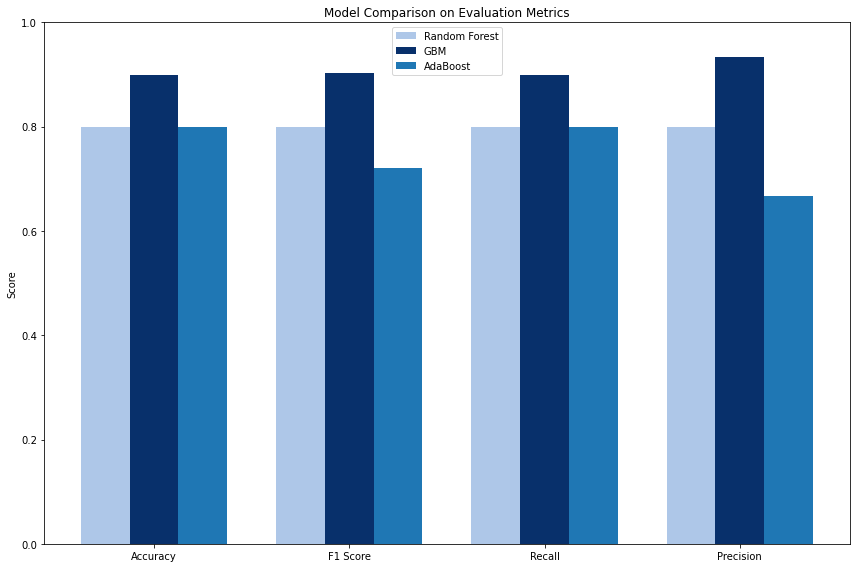

In [12]:
import numpy as np

# Set the positions and width for the bars
positions = np.arange(len(df_metrics.columns))
bar_width = 0.25  # Width of bars

# Define colors for each model using the green palette
colors = ['#aec7e8', '#08306b', '#1f77b4']  # Light green, medium green, and dark green

# Plotting
plt.figure(figsize=(12, 8))

# Plot each model's metrics with the specified colors
for i, (model, color) in enumerate(zip(df_metrics.index, colors)):
    plt.bar(positions + i * bar_width, df_metrics.loc[model], width=bar_width, label=model, color=color)

plt.title('Model Comparison on Evaluation Metrics')
plt.xticks(positions + bar_width, df_metrics.columns)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()